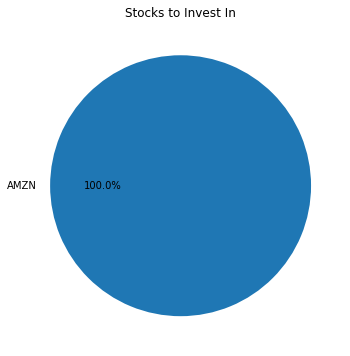

Expected Return: 2.6150997662630053


Output()

In [2]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt

# Load your dataset into a DataFrame (replace 'data.csv' with your file path)
df = pd.read_csv('Data/data.csv')

# Create interactive widgets
brokerage_dropdown = widgets.Dropdown(options=df['Brokage'].unique().tolist(), description='Brokerage:')
min_esg_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.01, description='Min ESG:')
max_risk_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.01, description='Max Risk:')

# Define function to update the dashboard
def update_dashboard(brokerage, min_esg, max_risk):
    filtered_data = df[(df['Brokage'] == brokerage) & (df['ESG'] >= min_esg) & (df['Risk'] <= max_risk)]
    
    # Calculate expected return
    expected_return = filtered_data['Return'].mean()
    
    # Pie chart showing stocks to invest in
    invest_data = filtered_data[['Stock', 'Return']]
    invest_data = invest_data.groupby('Stock').sum()
    invest_data = invest_data[invest_data['Return'] == invest_data['Return'].max()]
    
    plt.figure(figsize=(8, 6))
    plt.pie(invest_data['Return'], labels=invest_data.index, autopct='%1.1f%%')
    plt.title('Stocks to Invest In')
    plt.show()
    
    # Display expected return
    print(f'Expected Return: {expected_return}')

# Create dashboard layout
controls = widgets.VBox([brokerage_dropdown, min_esg_slider, max_risk_slider])
dashboard = widgets.interactive_output(update_dashboard, {'brokerage': brokerage_dropdown, 'min_esg': min_esg_slider, 'max_risk': max_risk_slider})

# Display dashboard
display(controls, dashboard)


In [3]:
df

,Unnamed: 0,Brokage,Stock,Risk,Return,ESG
0,0,Questrade,NVDA,0.517131,3.482384,0.902762
1,1,BMO,META,0.650048,3.359599,0.906068
2,2,RBC,AMZN,0.864540,1.066760,0.780183
3,3,RBC,AAPL,0.822252,3.668041,0.930763
4,4,BMO,TSLA,0.214592,4.328280,0.410243
5,5,BMO,AMZN,0.634844,1.041129,0.006708
6,6,WealthSimple,AAPL,0.044146,4.886704,0.049440
7,7,WealthSimple,AAPL,0.456171,3.454230,0.045698
8,8,Questrade,NVDA,0.473706,3.876310,0.224475
9,9,WealthSimple,AMZN,0.943366,0.831013,0.921364


In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df

,Brokage,Stock,Risk,Return,ESG
0,Questrade,NVDA,0.517131,3.482384,0.902762
1,BMO,META,0.650048,3.359599,0.906068
2,RBC,AMZN,0.864540,1.066760,0.780183
3,RBC,AAPL,0.822252,3.668041,0.930763
4,BMO,TSLA,0.214592,4.328280,0.410243
5,BMO,AMZN,0.634844,1.041129,0.006708
6,WealthSimple,AAPL,0.044146,4.886704,0.049440
7,WealthSimple,AAPL,0.456171,3.454230,0.045698
8,Questrade,NVDA,0.473706,3.876310,0.224475
9,WealthSimple,AMZN,0.943366,0.831013,0.921364


In [11]:
# Assuming your DataFrame is named df
df.to_excel('filename.xlsx', index=False)

In [10]:
import openpyxl

In [9]:
pip install openpyxl

     -------------------------------------- 250.0/250.0 KB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
